# 随机数的产生

作者：[王何宇](http://person.zju.edu.cn/wangheyu)

[浙江大学数学科学学院](http://www.math.zju.edu.cn)

In [4]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

## 程序例子：经典 Fibonacci 产生器

我们来验证经典 Fibonacci 产生器的缺陷。

In [5]:
def rand_add_mod(X0, X1, M, N):
    X = np.zeros(N)
    X[0] = X0
    X[1] = X1
    for i in range(2, N):
        X[i] = (X[i - 2] + X[i - 1]) % M
    return X / (M - 1)

产生随机数的参数比较不好搞，下面产生的是5000个U(0, 1)的伪随机数。

In [6]:
X = rand_add_mod(197, 39, 65535, 5000)

我们直接用点图看一下它的均匀性，似乎不错？

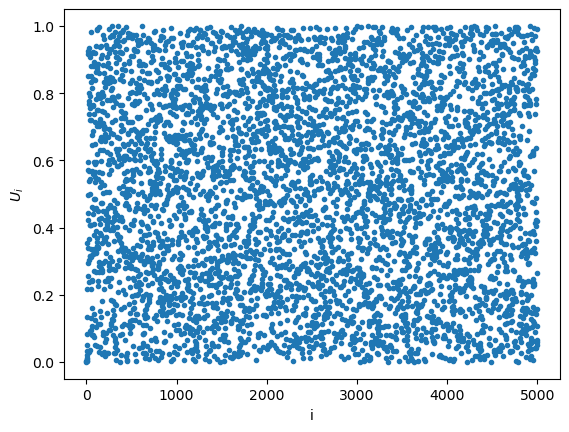

In [7]:
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")
#plt.savefig("add_mod_random_test.pdf")
plt.show()

而接下去这段诡异的过程可以称为“找规律”。给出一个特殊的抽样，使得样本出现强烈的规律性。

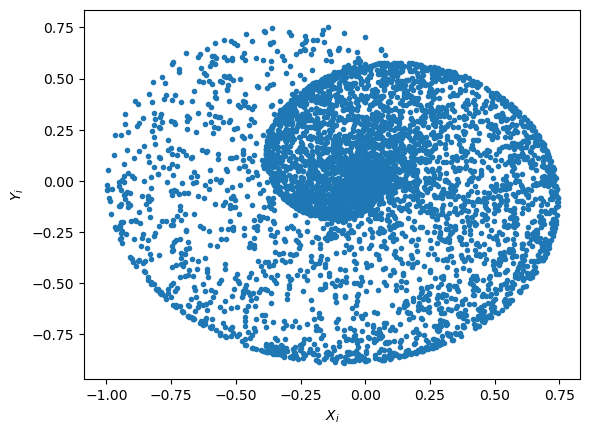

In [8]:
x = np.zeros(4998)
y = np.zeros(4998)
for i in range(1,4998):
    x[i] = np.sqrt(X[i]) * np.cos(2 * np.pi * X[i + 1]) * np.sin(np.pi * X[i + 2])
    y[i] = np.sqrt(X[i]) * np.sin(2 * np.pi * X[i + 1]) * np.sin(np.pi * X[i + 2])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
#plt.savefig("add_mod_random_fail.pdf")    
plt.show()

先调入三维绘图库。

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

再补一刀，加同余的三维分布：

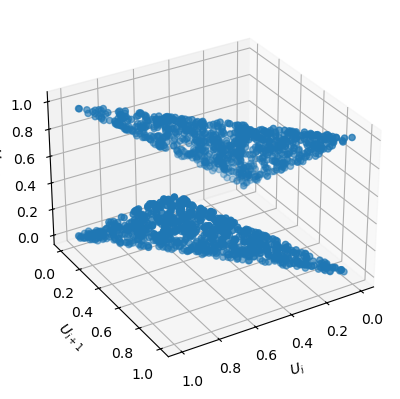

In [10]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')  # 正确创建3D子图
ax.view_init(azim=59)
ax.scatter(X[0:-2:3], X[1:-1:3], X[2:-1:3])
ax.set_xlabel("$U_{i}$")
ax.set_ylabel("$U_{i + 1}$")
ax.set_zlabel("$U_{i + 2}$")
#plt.savefig("RANDU_fail.pdf")
plt.show()

## 程序例子：线性同余产生器

线性同余产生器是目前仍在广泛使用的一个方法。但一般需要和其他方法组合使用。

In [11]:
def rand_mul_mod(X0, M, A, C, N):
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        X[i] = (A * X[i - 1] + C) % M
    return X / (M - 1)

先看两个不恰当选择参数所产生的问题。

In [12]:
X = rand_mul_mod(13, 2147483647, 7, 0, 5000) #BAD

同样，仅从一维序列角度并看不出有什么问题。

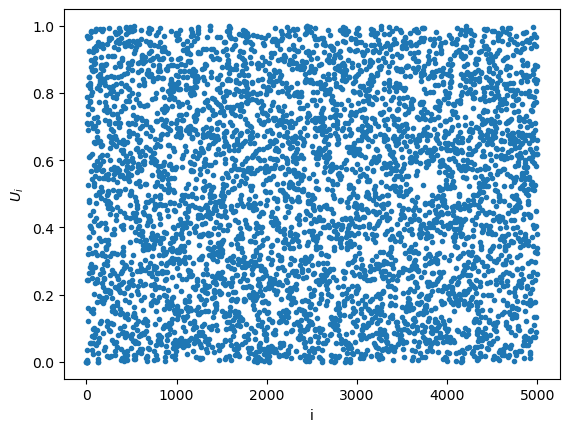

In [13]:
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")
plt.show()

然而，其2维分布就相当令人感伤了。

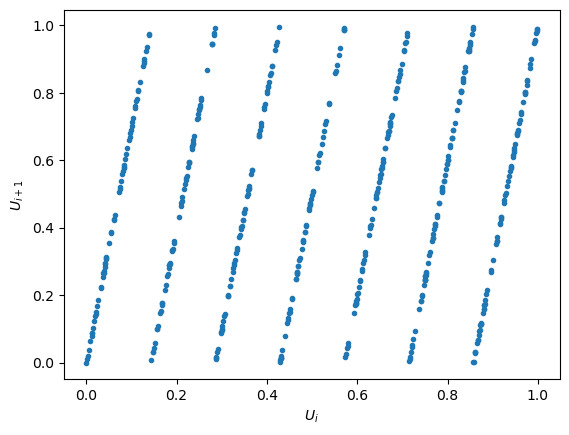

In [14]:
plt.plot(X[0:-2:10],X[1:-1:10],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")
plt.show()

同样的，它也没有逃过螺旋线的控制（尽管已经不是Fibonacci了）。

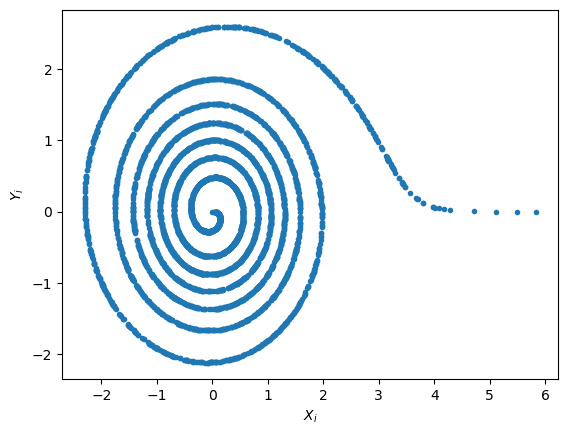

In [15]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
#plt.savefig("mul_mod_random_fail.pdf")    
plt.show()

再来一个。一维总是很OK的。

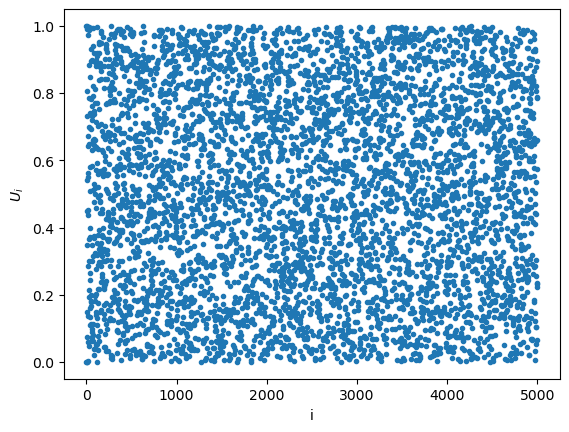

In [16]:
X = rand_mul_mod(13, 2147483647, 2147483630, 0, 5000) #BAD
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")
plt.show()

但二维和正态分布都挂了。

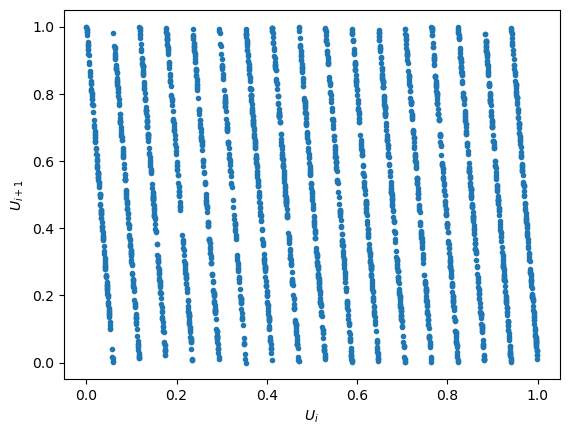

In [17]:
plt.plot(X[0:-2:2],X[1:-1:2],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")
plt.show()

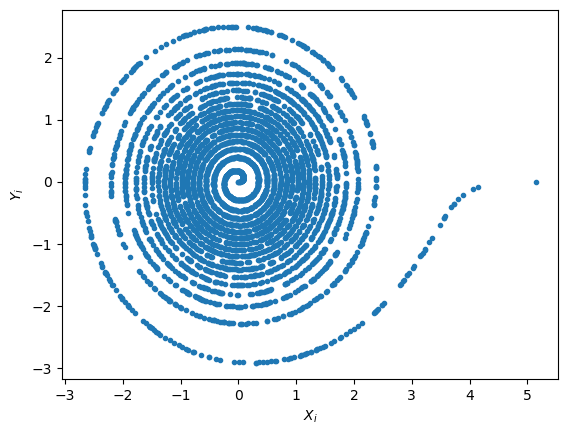

In [18]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
#plt.savefig("mul_mod_random_fail.pdf")
plt.show()

按么根据数论原理精挑细选会不会好点呢？这里有一组在IBM 360系统上用了很多年的经典参数：

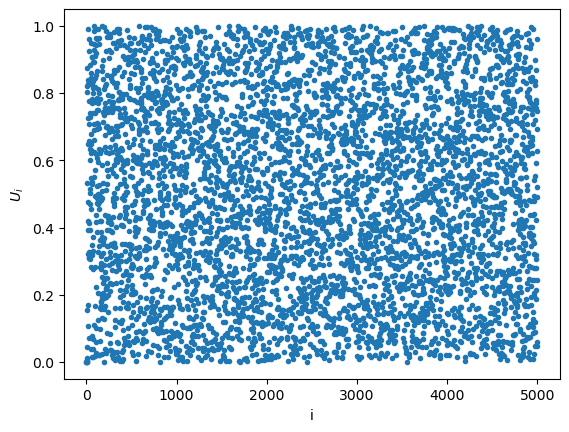

In [19]:
X = rand_mul_mod(1, 2147483648, 65539, 0, 5000) #IBM 360
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$U_i$")
plt.show()

二维检验，通过！

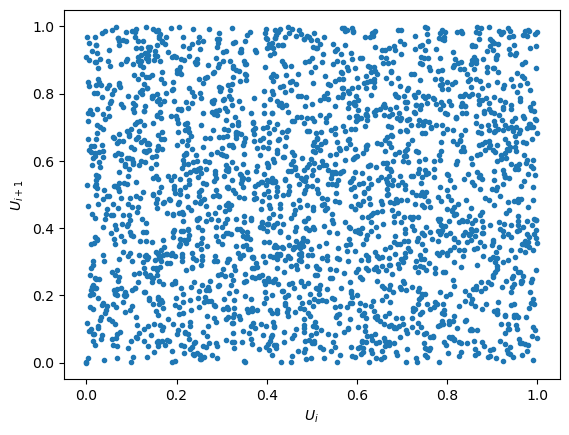

In [20]:
plt.plot(X[0:-2:2],X[1:-1:2],'.')
plt.xlabel("$U_{i}$")
plt.ylabel("$U_{i + 1}$")
plt.show()

正态分布检验，也通过！IBM还是有的门道滴...

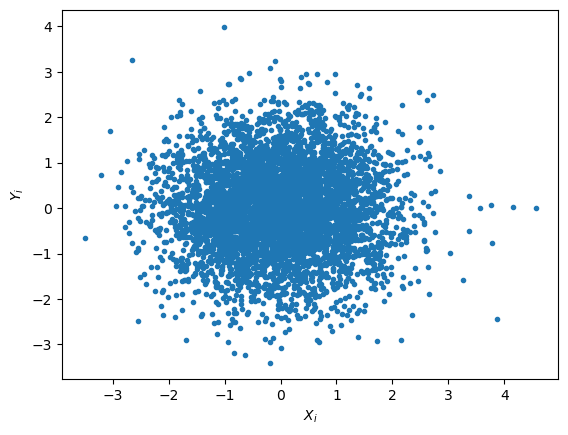

In [21]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
#plt.savefig("mul_mod_random_fail.pdf")
plt.show()

然而...看看三维？

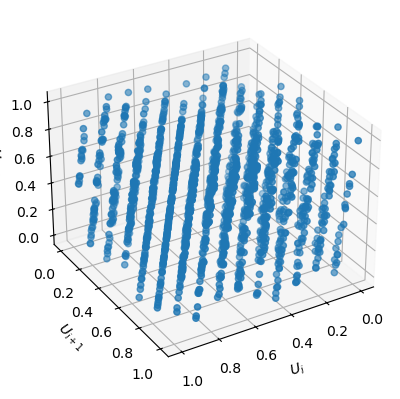

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 正确创建3D子图
#ax = Axes3D(fig)
ax.view_init(azim=59)
ax.scatter(X[0:-2:3], X[1:-1:3], X[2:-1:3])
ax.set_xlabel("$U_{i}$")
ax.set_ylabel("$U_{i + 1}$")
ax.set_zlabel("$U_{i + 2}$")
#plt.savefig("RANDU_fail.pdf")
plt.show()

这个办法在单独的线性同余生成器中是必须面对的，所以在生成高维数据时，必须小心。否则你可能就是在这些平面采样，而不是在全空间采样。

## 程序例子：梅森旋转MT19937实现

下面的例子在cnblog上网友xlxw的blog《Python下探究随机数的产生原理和算法》，网址：

[https://www.cnblogs.com/lzxwalex/p/6880748.html](https://www.cnblogs.com/lzxwalex/p/6880748.html)

提供的代码基础上修改而成，并参考了CSDN网友tick\_tokc97的blog《伪随机数生成——梅森旋转（Mersenne Twister/MT）算法笔记》，网址：

[https://blog.csdn.net/tick_tock97/article/details/78657851](https://blog.csdn.net/tick_tock97/article/details/78657851)

MT19937是基于32位整数的算法，首先定义一个规范32位字长的函数。

In [23]:
def inter(t):
    return(0xFFFFFFFF & t) #取最后32位->t

梅森旋转需要一个工作区，MT19937的工作区长度是624，初始化过程如下：

In [24]:
def mainset(seed, M):
    M[0] = seed    #seed
    for i in range(1,624):
        M[i] = inter(1812433253 * (M[i - 1] ^ M[i - 1] >> 30) + i)
    return M

接下去是关键的一步：对工作区进行梅森旋转。

In [25]:
def twister(M):
    for i in range(624):
        # 截取M[i]高位和M[i+1](越界就返回M[0])低位，用普通加法合并，对齐32位
        # 这里高位取了1位，低位取了31位。
        y = inter((M[i] & 0x80000000) +(M[(i + 1) % 624] & 0x7fffffff))
        yA = y >> 1
        if y & 1 == 1: #取最低位
            yA = yA ^ 0x9908b0df
        M[i] = M[(i + 397) % 624] ^ yA
    return M

实际的随机数生成依赖工作区进行递推，因此每产生624个随机数，需要新旋转工作区。

In [26]:
def exnum(M, index):
    y = M[index]
    y = y ^ y >> 11
    y = y ^ y << 7 & 2636928640
    y = y ^ y << 15 & 4022730752
    y = y ^ y >> 18
    index = index + 1
    return inter(y)

主流程如下

In [27]:
def MT19937(seed,num):
    U = [0]*num
    M = [0]*624
    M = mainset(seed, M)
    twister(M)
    for i in range(num):
        index = i % 624
        U[i] = exnum(M, index) / (2**32 - 1)
        if (index == 623):
            twister(M)
    return U     

测试一下：

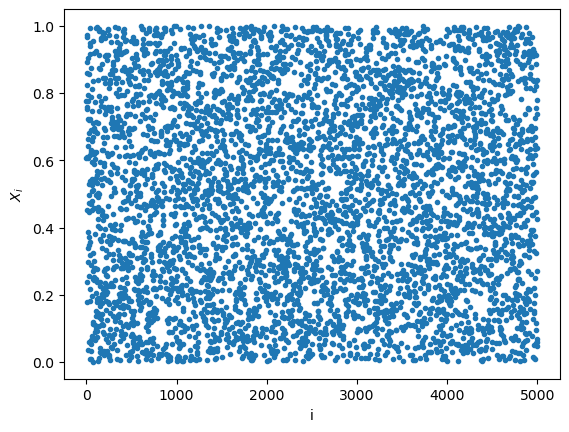

In [28]:
X=MT19937(13, 5000)
plt.plot(X,'.')
plt.xlabel("i")
plt.ylabel("$X_i$")
plt.show()

以及二维正态分布：

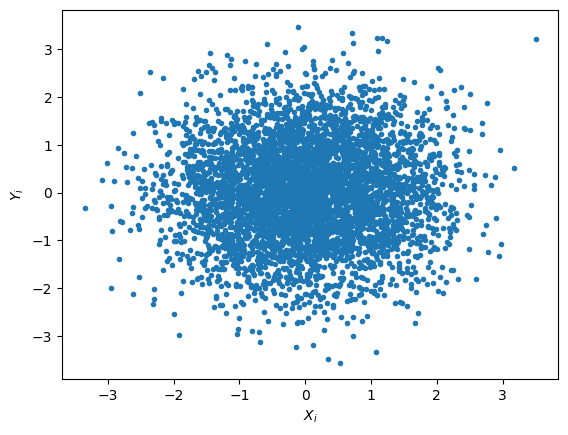

In [29]:
x = np.zeros(4999)
y = np.zeros(4999)
for i in range(1,4999):
    x[i] = np.sqrt(-2 * np.log(X[i])) * np.cos(2 * np.pi * X[i + 1])
    y[i] = np.sqrt(-2 * np.log(X[i])) * np.sin(2 * np.pi * X[i + 1])
plt.plot(x,y,'.')
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.show()

下面生成了500个1000维随机向量（一共50万个随机数，MT19937还是很快）。

In [30]:
X=np.zeros(500000)
X=MT19937(13, 500000)
X=(np.reshape(X,(500,1000))).T # 最后转置一下

看一下$(X_1, X_2)$和$(X_{999}, X_{1000})$两个平面的的分布情况。

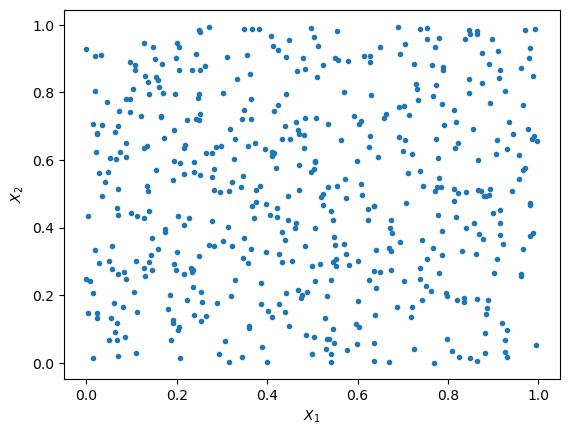

In [31]:
plt.plot(X[0,:],X[1,:],'.')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
#plt.savefig("MT19937_X1X2.pdf")
plt.show()

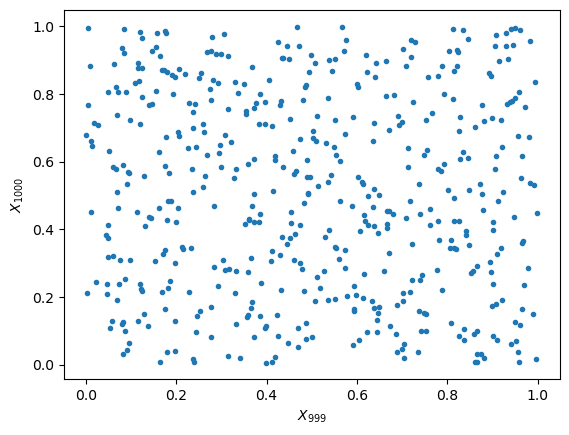

In [32]:
plt.plot(X[998,:],X[999,:],'.')
plt.xlabel("$X_{999}$")
plt.ylabel("$X_{1000}$")
#plt.savefig("MT19937_X999X1000.pdf")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def bootstrap_ci(data, alpha=0.05, B=1000):
    n = len(data)
    original_mean = np.mean(data) #计算样本均值
    boot_means = [] # 进行 B 次自助抽样
    for _ in range(B):
        resample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(resample))
    
    deviations = np.array(boot_means) - original_mean # 计算偏差序列
    
    lower_quantile = np.quantile(deviations, alpha / 2) #计算分位数
    upper_quantile = np.quantile(deviations, 1 - alpha / 2)
    
    lower_bound = original_mean - upper_quantile #置信区间
    upper_bound = original_mean - lower_quantile
    
    return lower_bound, upper_bound,boot_means

data = [
    22.8, 16.4, 13.7, 16.9, 30.0, 16.0, 14.1, 15.1, 14.2, 18.2,
    22.9, 27.7, 16.5, 16.2, 40.2, 19.1, 13.6, 19.0, 20.3, 19.8,
    18.3, 15.5, 15.8, 19.1, 11.6, 18.5, 16.1, 17.0, 12.1, 19.3
       ]
np.random.seed(0)
lower, upper , boot_means = bootstrap_ci(data, alpha=0.05, B=1000)
print(f"95% 置信区间: [{lower:.2f}, {upper:.2f}]") #计算置信区间

# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# axes[0].hist(data, bins=10, color='skyblue', edgecolor='black')
# axes[0].set_title('Histogram of Original Samples')
# axes[0].set_xlabel('Value')
# axes[0].set_ylabel('Frequency')
# axes[1].hist(boot_means, bins=30, color='salmon', edgecolor='black', density=True)
# axes[1].axvline(lower, color='red', linestyle='--', label='Lower CI Bound')
# axes[1].axvline(upper, color='green', linestyle='--', label='Upper CI Bound')
# axes[1].axvline(np.mean(data), color='blue', linestyle='-', label='Mean of Sample')
# axes[1].set_title('Distribution of Bootstrap Means')
# axes[1].set_xlabel('Mean Value')
# axes[1].set_ylabel('Density')
# axes[1].legend()

# plt.tight_layout()
# plt.savefig("samples.png")  # 可选：保存图片
# plt.show()

# 图1：原始数据直方图
plt.figure(figsize=(7, 5))
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("1.png", dpi=300, bbox_inches='tight')
plt.close()  # 关闭当前图像，避免重叠

# 图2：自助抽样均值分布直方图
plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=30, color='salmon', edgecolor='black', density=True)
plt.axvline(lower, color='red', linestyle='--', label='Lower CI Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper CI Bound')
plt.axvline(np.mean(data), color='blue', linestyle='-', label='Mean of Sample')
plt.title('Distribution of Bootstrap Means')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("2.png", dpi=300, bbox_inches='tight')
plt.close()

95% 置信区间: [16.12, 20.35]


95%置信区间: [16.94, 21.26]


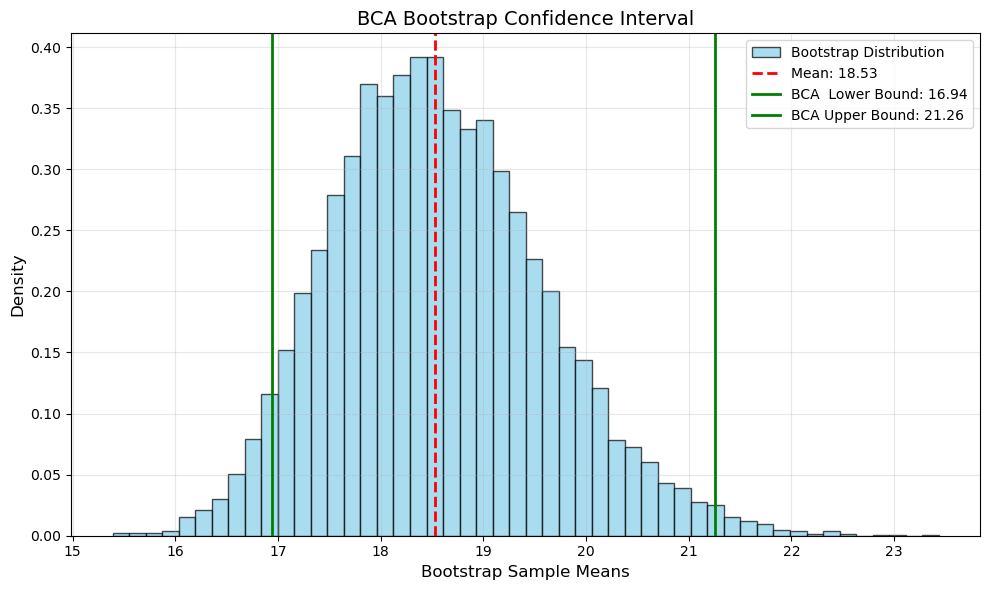

In [2]:
import numpy as np
import scipy.stats as stats
from scikits.bootstrap import ci
import matplotlib.pyplot as plt

data = [
    22.8, 16.4, 13.7, 16.9, 30.0, 16.0, 14.1, 15.1, 14.2, 18.2,
    22.9, 27.7, 16.5, 16.2, 40.2, 19.1, 13.6, 19.0, 20.3, 19.8,
    18.3, 15.5, 15.8, 19.1, 11.6, 18.5, 16.1, 17.0, 12.1, 19.3
]
bootstrap_ci = ci(data, statfunction=np.mean, method='bca', n_samples=10000)
print(f"95%置信区间: [{bootstrap_ci[0]:.2f}, {bootstrap_ci[1]:.2f}]")


# Generate bootstrap means distribution (for plotting)
def bootstrap_means(data, B=10000):
    return np.array([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(B)])

boot_means = bootstrap_means(data, B=10000)

# Plot the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Bootstrap Distribution')

# Add the original mean
original_mean = np.mean(data)
plt.axvline(original_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {original_mean:.2f}')

# Add BCa confidence interval
plt.axvline(bootstrap_ci[0], color='green', linestyle='-', linewidth=2, label=f'BCA  Lower Bound: {bootstrap_ci[0]:.2f}')
plt.axvline(bootstrap_ci[1], color='green', linestyle='-', linewidth=2, label=f'BCA Upper Bound: {bootstrap_ci[1]:.2f}')

# Chart customization
plt.xlabel('Bootstrap Sample Means', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('BCA Bootstrap Confidence Interval', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig("3.png", dpi=300, bbox_inches='tight')
plt.show()

e:\Miniconda3\envs\mathsoft\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Miniconda3\envs\mathsoft\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Miniconda3\envs\mathsoft\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Miniconda3\envs\mathsoft\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Miniconda3\envs\mathsoft\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from fon

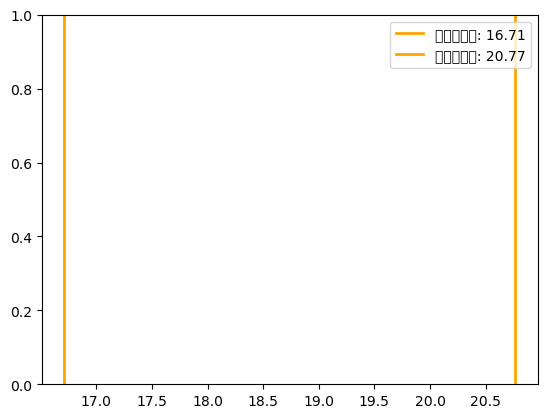

In [4]:
# 计算传统自助法（百分位法）置信区间
percentile_ci = ci(data, statfunction=np.mean, method='pi', n_samples=10000)

# 在图表中添加传统法置信区间
plt.axvline(percentile_ci[0], color='orange', linestyle='-', linewidth=2, label=f'传统法下限: {percentile_ci[0]:.2f}')
plt.axvline(percentile_ci[1], color='orange', linestyle='-', linewidth=2, label=f'传统法上限: {percentile_ci[1]:.2f}')

# 更新图例
plt.legend(loc='upper right')
plt.show()

In [6]:
import numpy as np
from scipy.stats import norm

# jackknife方法
def jackknife(data, stat_func):
    n = len(data)
    theta_jack = np.zeros(n)
    for i in range(n):
        theta_jack[i] = stat_func(np.delete(data, i))
    return theta_jack

#计算加速度因子
def compute_acceleration(data, theta_jack, stat_func):
    theta_dot = np.mean(theta_jack)
    num = np.sum((theta_dot - theta_jack) ** 3)
    den = np.sum((theta_dot - theta_jack) ** 2)
    a = num / (6 * (den ** 1.5)) if den != 0 else 0
    return a

def bca_ci(data, stat_func=np.mean, alpha=0.05, B=10000):
    n = len(data)
    original_stat = stat_func(data)

    # 自助抽样
    boot_stats = []
    for _ in range(B):
        resample = np.random.choice(data, size=n, replace=True)
        boot_stats.append(stat_func(resample))
    boot_stats = np.array(boot_stats)

    # 计算偏差校正因子 
    prop_less = np.mean(boot_stats < original_stat)
    z0 = norm.ppf(prop_less)

    # 计算加速度因子，用Jackknife方法
    theta_jack = jackknife(data, stat_func)
    a = compute_acceleration(data, theta_jack, stat_func)

    # 计算分位数
    z_alpha_half = norm.ppf(alpha / 2)
    z_1_minus_alpha_half = norm.ppf(1 - alpha / 2)
    def adjust_z(z):
        return z0 + z / (1 - a * z)
    alpha1 = norm.cdf(adjust_z(z_alpha_half))
    alpha2 = norm.cdf(adjust_z(z_1_minus_alpha_half))

    # 构建置信区间
    lower = np.quantile(boot_stats, alpha1)
    upper = np.quantile(boot_stats, alpha2)

    return np.array([lower, upper])

data = [
    22.8, 16.4, 13.7, 16.9, 30.0, 16.0, 14.1, 15.1, 14.2, 18.2,
    22.9, 27.7, 16.5, 16.2, 40.2, 19.1, 13.6, 19.0, 20.3, 19.8,
    18.3, 15.5, 15.8, 19.1, 11.6, 18.5, 16.1, 17.0, 12.1, 19.3
]
np.random.seed(0) #固定随机种子，使结果可以复现
ci_bca = bca_ci(data, stat_func=np.mean, alpha=0.05, B=10000)
print(f"95% 置信区间: [{ci_bca[0]:.2f}, {ci_bca[1]:.2f}]")

95% 置信区间: [16.91, 21.15]


In [2]:
import math
import numpy as np
def Solution(k):
    data = np.random.normal(loc = 0, scale = 1, size = k)
    data = data * data
    data = np.mean(data)
    return np.sqrt(2 * math.pi) * data
    
    
if __name__ == '__main__':
    k = 1000
    result = Solution(k) #采样1000个样本
    print('result：', result)


result： 2.64769275405027


In [4]:
import numpy as np

def metropolis_hastings(sigma=0.1, tol=1e-5, min_iter=1000, max_iter=100000):
    """
    使用Metropolis-Hastings算法估计后验分布的均值和方差
    停止条件：连续两次迭代的运行均值差小于tol
    参数：
        sigma: 建议分布的标准差
        tol: 停止阈值
        min_iter: 最小迭代次数
        max_iter: 最大迭代次数（防止无限循环）
    """
    # 初始化
    theta = 0.5  # 初始值
    samples = []  # 存储所有样本
    running_sum = 0.0  # 运行总和
    prev_mean = None  # 前一次迭代的运行均值
    
    # 迭代计数器
    t = 0
    
    while t < max_iter:
        # 生成候选点（正态分布）
        theta_star = np.random.normal(theta, sigma)
        
        # 计算接受概率（考虑边界条件）
        if theta_star < 0 or theta_star > 1:
            alpha = 0.0  # 边界外自动拒绝
        else:
            # 计算对数似然（避免数值下溢）
            log_pi_current = 4 * np.log(theta) + 6 * np.log(1 - theta) if theta > 0 and theta < 1 else -np.inf
            log_pi_star = 4 * np.log(theta_star) + 6 * np.log(1 - theta_star) if theta_star > 0 and theta_star < 1 else -np.inf
            
            # 计算对数接受概率
            log_alpha = log_pi_star - log_pi_current
            
            # 处理数值问题
            if np.isnan(log_alpha) or np.isinf(log_alpha):
                alpha = 0.0
            else:
                alpha = min(1.0, np.exp(log_alpha))
        
        # 接受/拒绝候选点
        if np.random.rand() <= alpha:
            theta = theta_star
        
        # 更新样本和运行总和
        samples.append(theta)
        running_sum += theta
        t += 1
        
        # 计算当前运行均值
        current_mean = running_sum / t
        
        # 检查停止条件（达到最小迭代次数后）
        if t >= min_iter:
            if prev_mean is not None:
                # 检查连续两次均值变化
                if abs(current_mean - prev_mean) < tol:
                    break
            prev_mean = current_mean  # 更新前一次均值
    
    # 计算最终统计量
    mean_estimate = np.mean(samples)
    var_estimate = np.var(samples, ddof=1)  # 无偏估计
    
    
    return {
        'iterations': t,
        'mean': mean_estimate,
        'variance': var_estimate,
        'samples': samples
    }


np.random.seed(42) 
results = metropolis_hastings(sigma=0.1, tol=1e-5, min_iter=1000, max_iter=100000)
print(f"iterations: {results['iterations']}")
print(f"mean: {results['mean']:.6f} ")
print(f"S: {results['variance']:.6f} ")


iterations: 1088
mean: 0.428681 
S: 0.019145 
